# Introduction to Neural Networks
This program will first implement a linear classifier and then extend the code to a neural network.
## Importing Packages
Just importing numpy and matplotlib.



In [7]:
# Credits Stanford CS 231n
# A bit of setup
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading extenrnal modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


##Plotting the data

We are creating a "spiral dataset" with three classes, 100 points per class. Visual representation of the resulting dataset is shown below. Notice that the dataset is **not** easily linearly separable.

(-1, 1)

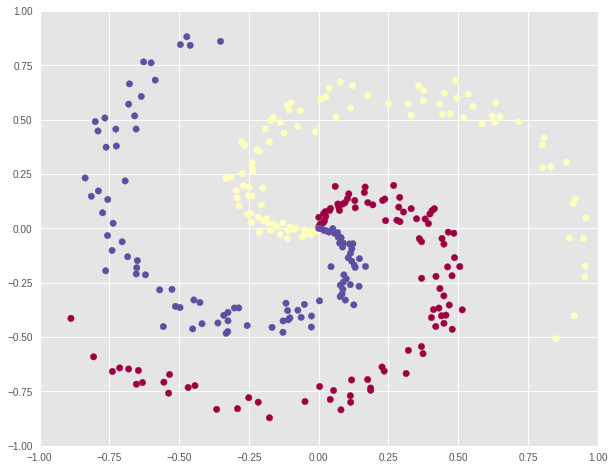

In [8]:
np.random.seed(0)
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
X = np.zeros((N*K,D))
y = np.zeros(N*K, dtype='uint8')
for j in range(K):
  ix = range(N*j,N*(j+1))
  r = np.linspace(0.0,1,N) # radius
  t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
  X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
  y[ix] = j
fig = plt.figure()
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim([-1,1])
plt.ylim([-1,1])
#fig.savefig('spiral_raw.png')

##Training a Linear Classifier

Here we randomly initialize parameters to small values clustered around 0. Parameters are the weight matrix W and bias vector b for each class.

We set hyperparameters  of learning rate and regularization strength.

##Gradient Descent

Here, we iterate through all of our training examples. We evaluate "class scores", which are the outputs of our hypothesis function, computed through matrix multiplication. 

We also calculate the **loss function**, taking average cross entropy loss and regularization. 





Gradient of the loss function with respect to the parameters is calculated. We now backpropagate into W and b through the matrix multiply operation.

Finally, the parameters are updated in the negative gradient direction to decrease the loss.

In [3]:
#Train a Linear Classifier

# initialize parameters randomly
W = 0.01 * np.random.randn(D,K)
b = np.zeros((1,K))

# some hyperparameters
step_size = 1e-2
reg = 0# 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(200):
  
  # evaluate class scores, [N x K]
  scores = np.dot(X, W) + b 
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W)
  loss = data_loss + reg_loss
  if i % 10 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters (W,b)
  dW = np.dot(X.T, dscores)
  db = np.sum(dscores, axis=0, keepdims=True)
  
  dW += reg*W # regularization gradient
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db

iteration 0: loss 1.096919
iteration 10: loss 1.094019
iteration 20: loss 1.091151
iteration 30: loss 1.088316
iteration 40: loss 1.085512
iteration 50: loss 1.082739
iteration 60: loss 1.079997
iteration 70: loss 1.077286
iteration 80: loss 1.074605
iteration 90: loss 1.071954
iteration 100: loss 1.069332
iteration 110: loss 1.066739
iteration 120: loss 1.064174
iteration 130: loss 1.061639
iteration 140: loss 1.059131
iteration 150: loss 1.056651
iteration 160: loss 1.054198
iteration 170: loss 1.051772
iteration 180: loss 1.049373
iteration 190: loss 1.047000


We can see now that we have converged after these 190 iterations. Now we will evaluate the accuracy on the training set:

In [4]:
# evaluate training set accuracy
scores = np.dot(X, W) + b
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

training accuracy: 0.49


Training accuracy was low because we used a linear classifier.

(-1.8712034092398278, 1.8687965907601756)

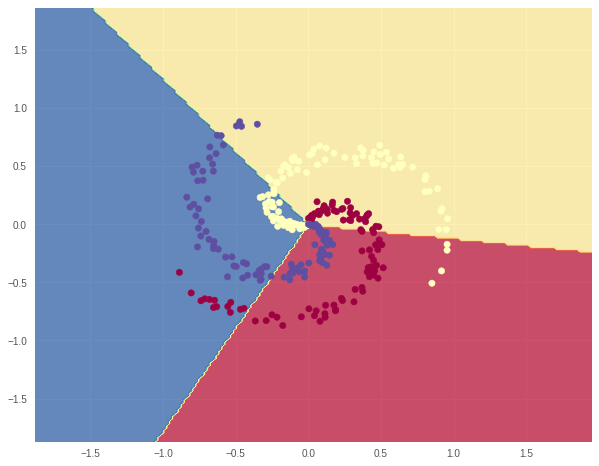

In [5]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_linear.png')

As shown, a linear classifier is inadequate for this problem. Thus, we now implement a neural network. Below, we add one hidden layer. We'll also need two sets of weights and layers for our first and second layers.

The only change in the code is at the comment:

```
# evaluate class scores, [N x K]
```
 where the hidden layer representation, then the scores based on the hidden layer, are computed.
 
 Everything else


In [6]:
# initialize parameters randomly
h = 100 # size of hidden layer
W = 0.01 * np.random.randn(D,h)
b = np.zeros((1,h))
W2 = 0.01 * np.random.randn(h,K)
b2 = np.zeros((1,K))

# some hyperparameters
step_size = 1e-1
reg = 1e-3 # regularization strength

# gradient descent loop
num_examples = X.shape[0]
for i in range(40000):
  
  # evaluate class scores, [N x K]
  hidden_layer = np.maximum(0, np.dot(X, W) + b) # note, ReLU activation
  scores = np.dot(hidden_layer, W2) + b2
  
  # compute the class probabilities
  exp_scores = np.exp(scores)
  probs = exp_scores / np.sum(exp_scores, axis=1, keepdims=True) # [N x K]
  
  # compute the loss: average cross-entropy loss and regularization
  corect_logprobs = -np.log(probs[range(num_examples),y])
  data_loss = np.sum(corect_logprobs)/num_examples
  reg_loss = 0.5*reg*np.sum(W*W) + 0.5*reg*np.sum(W2*W2)
  loss = data_loss + reg_loss
  if i % 1000 == 0:
    print ("iteration %d: loss %f" % (i, loss))
  
  # compute the gradient on scores
  dscores = probs
  dscores[range(num_examples),y] -= 1
  dscores /= num_examples
  
  # backpropate the gradient to the parameters
  # first backprop into parameters W2 and b2
  dW2 = np.dot(hidden_layer.T, dscores)
  db2 = np.sum(dscores, axis=0, keepdims=True)
  # next backprop into hidden layer
  dhidden = np.dot(dscores, W2.T)
  # backprop the ReLU non-linearity
  dhidden[hidden_layer <= 0] = 0
  # finally into W,b
  dW = np.dot(X.T, dhidden)
  db = np.sum(dhidden, axis=0, keepdims=True)
  
  # add regularization gradient contribution
  dW2 += reg * W2
  dW += reg * W
  
  # perform a parameter update
  W += -step_size * dW
  b += -step_size * db
  W2 += -step_size * dW2
  b2 += -step_size * db2

iteration 0: loss 1.098637
iteration 1000: loss 0.721113
iteration 2000: loss 0.647924
iteration 3000: loss 0.489846
iteration 4000: loss 0.390142
iteration 5000: loss 0.352389
iteration 6000: loss 0.330928
iteration 7000: loss 0.315889
iteration 8000: loss 0.304525
iteration 9000: loss 0.295862
iteration 10000: loss 0.289756
iteration 11000: loss 0.283404
iteration 12000: loss 0.278133
iteration 13000: loss 0.273397
iteration 14000: loss 0.269993
iteration 15000: loss 0.267265
iteration 16000: loss 0.264786
iteration 17000: loss 0.262505
iteration 18000: loss 0.260322
iteration 19000: loss 0.258366
iteration 20000: loss 0.256634
iteration 21000: loss 0.255140
iteration 22000: loss 0.253900
iteration 23000: loss 0.252888
iteration 24000: loss 0.252051
iteration 25000: loss 0.251325
iteration 26000: loss 0.250711
iteration 27000: loss 0.250210
iteration 28000: loss 0.249794
iteration 29000: loss 0.249442
iteration 30000: loss 0.249162
iteration 31000: loss 0.248920
iteration 32000: loss

In [0]:
# evaluate training set accuracy
hidden_layer = np.maximum(0, np.dot(X, W) + b)
scores = np.dot(hidden_layer, W2) + b2
predicted_class = np.argmax(scores, axis=1)
print ('training accuracy: %.2f' % (np.mean(predicted_class == y)))

In [0]:
# plot the resulting classifier
h = 0.02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = np.dot(np.maximum(0, np.dot(np.c_[xx.ravel(), yy.ravel()], W) + b), W2) + b2
Z = np.argmax(Z, axis=1)
Z = Z.reshape(xx.shape)
fig = plt.figure()
plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.Spectral)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
#fig.savefig('spiral_net.png')